### Task 1

In [ ]:
import json
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open(file='NLP/3/train-v2.0.json',mode='r',encoding='utf-8') as input_file_stream:
  dataset_json=json.load(input_file_stream)
  dataset_json=dataset_json['data']
  print(dataset_json[0]['paragraphs'][0]['qas'])
  print(dataset_json[0]['paragraphs'][0]['context'])

[{'question': 'When did Beyonce start becoming popular?', 'id': '56be85543aeaaa14008c9063', 'answers': [{'text': 'in the late 1990s', 'answer_start': 269}], 'is_impossible': False}, {'question': 'What areas did Beyonce compete in when she was growing up?', 'id': '56be85543aeaaa14008c9065', 'answers': [{'text': 'singing and dancing', 'answer_start': 207}], 'is_impossible': False}, {'question': "When did Beyonce leave Destiny's Child and become a solo singer?", 'id': '56be85543aeaaa14008c9066', 'answers': [{'text': '2003', 'answer_start': 526}], 'is_impossible': False}, {'question': 'In what city and state did Beyonce  grow up? ', 'id': '56bf6b0f3aeaaa14008c9601', 'answers': [{'text': 'Houston, Texas', 'answer_start': 166}], 'is_impossible': False}, {'question': 'In which decade did Beyonce become famous?', 'id': '56bf6b0f3aeaaa14008c9602', 'answers': [{'text': 'late 1990s', 'answer_start': 276}], 'is_impossible': False}, {'question': 'In what R&B group was she the lead singer?', 'id': '

In [ ]:
# Process the json
context_list=[]
question_list=[]
id_list=[]
answers_list=[]
answer_start_list=[]
answer_end_list=[]
is_impossible_list=[]

for entry in dataset_json:
  for paragraph in entry['paragraphs']:
    for qa in paragraph['qas']:
      for ans in qa['answers']:
        context_list.append(paragraph['context'])
        question_list.append(qa['question'])
        id_list.append(qa['id'])
        answers_list.append(ans['text'])
        answer_start_list.append(ans['answer_start'])
        answer_end_list.append(ans['answer_start']+len(ans['text']))
        is_impossible_list.append(qa['is_impossible'])

In [ ]:
# Convert to DataFrame
df_train=pd.DataFrame({
    'context':context_list,
    'question':question_list,
    'id':id_list,
    'answers':answers_list,
    'answer_start':answer_start_list,
    'answer_end':answer_end_list,
    'is_impossible':is_impossible_list,
  })

print(df_train.shape)

(86821, 7)


In [ ]:
df_train.head()

,context,question,id,answers,answer_start,answer_end,is_impossible
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,in the late 1990s,269,286,False
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,singing and dancing,207,226,False
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,56be85543aeaaa14008c9066,2003,526,530,False
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,"Houston, Texas",166,180,False
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,late 1990s,276,286,False


In [ ]:
df_train.to_csv('NLP/3/df_train_CompleteDataSet.csv',index=False)

In [ ]:
df_train['is_impossible'].value_counts()

is_impossible
False    86821
Name: count, dtype: int64

In [ ]:
df_train['context'].nunique()

18877

In [ ]:
unique_context_df=df_train['context'].value_counts().reset_index()
print(unique_context_df.shape)

(18877, 2)


In [ ]:
unique_context_df.head()

,context,count
0,"Victoria married her first cousin, Prince Albe...",25
1,"In 1853, Victoria gave birth to her eighth chi...",25
2,"Victoria later described her childhood as ""rat...",23
3,"In March 1861, Victoria's mother died, with Vi...",20
4,"On 2 March 1882, Roderick Maclean, a disgruntl...",20


In [ ]:
unique_context_df['count'].unique()

array([25, 23, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1])

In [ ]:
# Create the histogram plot
def plot_histogram(df,c_name)->None:
  frequency_counter=Counter(df['count'])
  elements=list(frequency_counter.keys())
  frequencies=list(frequency_counter.values())
  plt.bar(elements,frequencies)
  plt.xlabel(f'#{c_name}')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of #{c_name} Questions')
  plt.show()
  return None

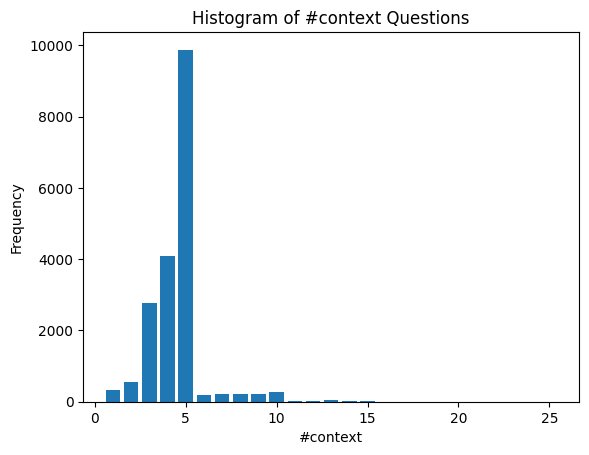

In [ ]:
plot_histogram(df=unique_context_df,c_name='context')

In [ ]:
print('Duplicates in DF : ',df_train[df_train.duplicated()].shape)

Duplicates in DF :  (0, 7)


In [ ]:
# Create the distribution plot
def get_distribution_plot(vals:np.ndarray,col_name:str,bin_size:int,kde_flag:bool)->None:
  plt.figure(figsize=(10,6))
  sns.distplot(vals,kde=kde_flag,bins=bin_size,color='blue')
  plt.title(f'Distribution of {col_name}')
  plt.xlabel(f'{col_name}')
  plt.ylabel('Frequency')
  plt.show()
  return None

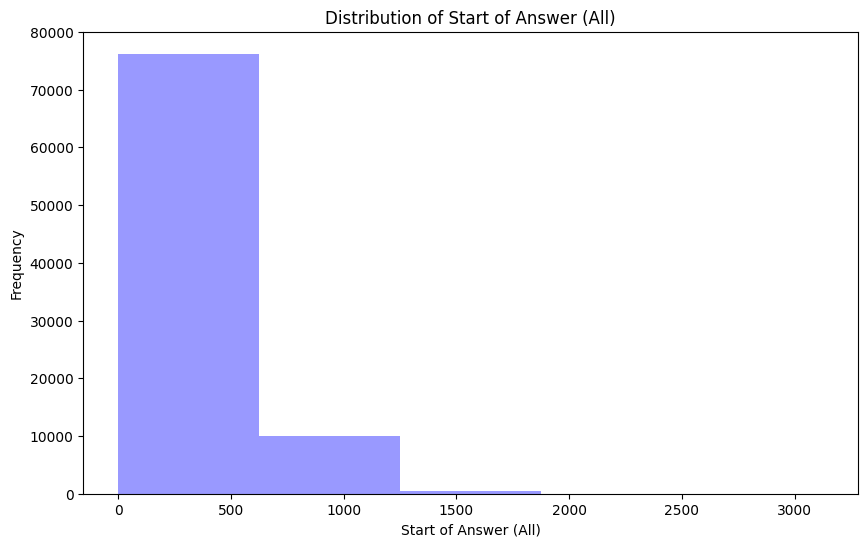

In [ ]:
get_distribution_plot(vals=df_train['answer_start'].values,col_name='Start of Answer (All)',bin_size=5,kde_flag=False)

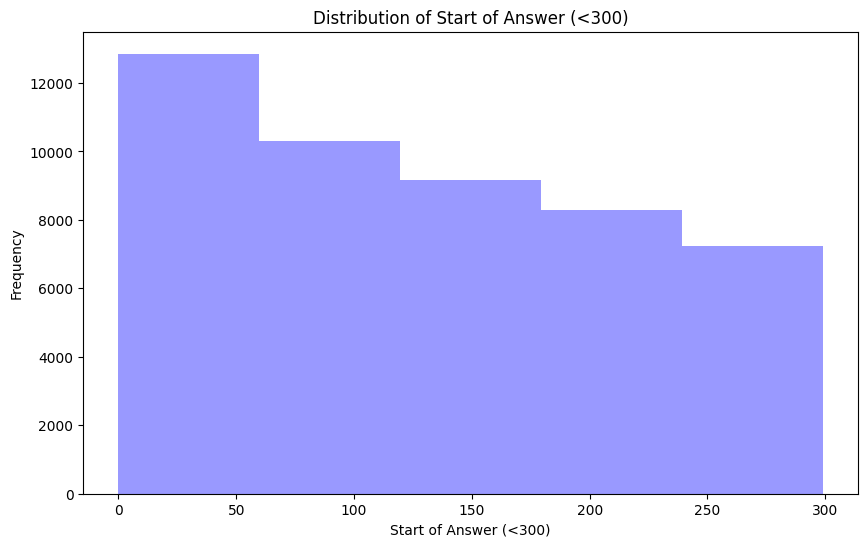

In [ ]:
get_distribution_plot(vals=df_train[df_train['answer_start']<300]['answer_start'],col_name='Start of Answer (<300)',bin_size=5,kde_flag=False)

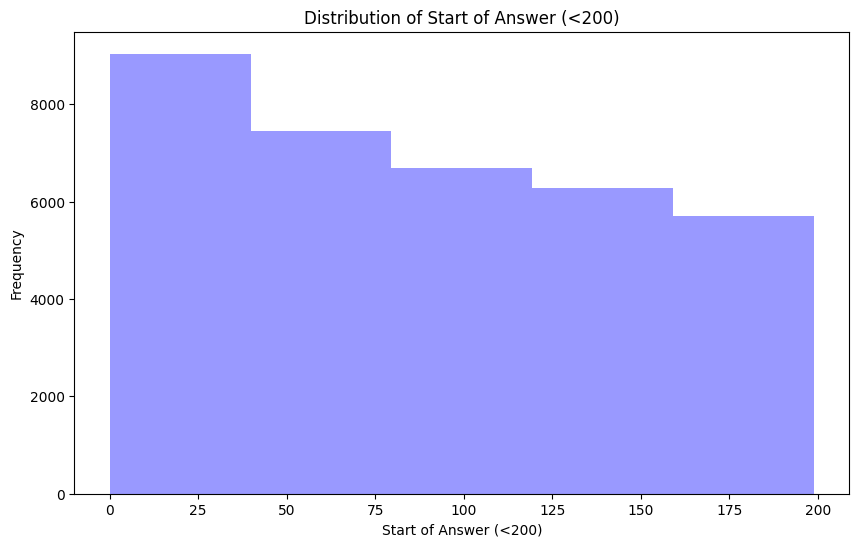

In [ ]:
get_distribution_plot(vals=df_train[df_train['answer_start']<200]['answer_start'],col_name='Start of Answer (<200)',bin_size=5,kde_flag=False)

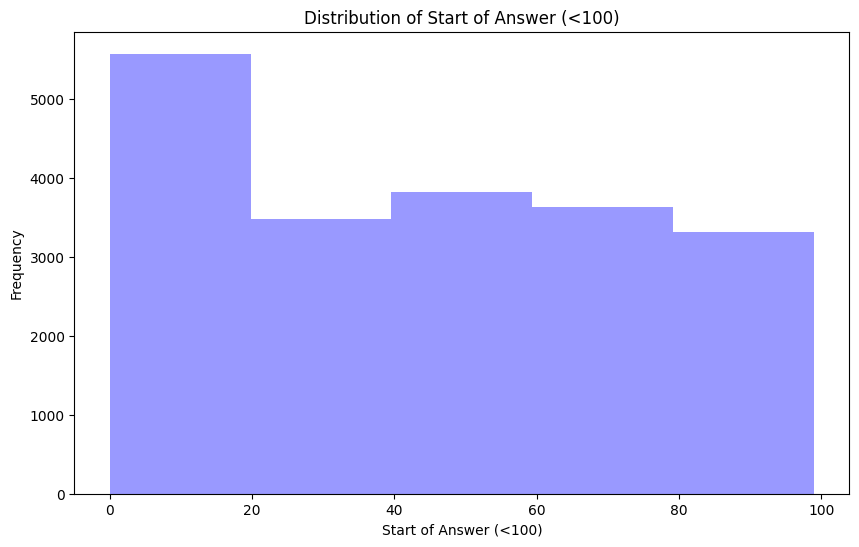

In [ ]:
get_distribution_plot(vals=df_train[df_train['answer_start']<100]['answer_start'],col_name='Start of Answer (<100)',bin_size=5,kde_flag=False)

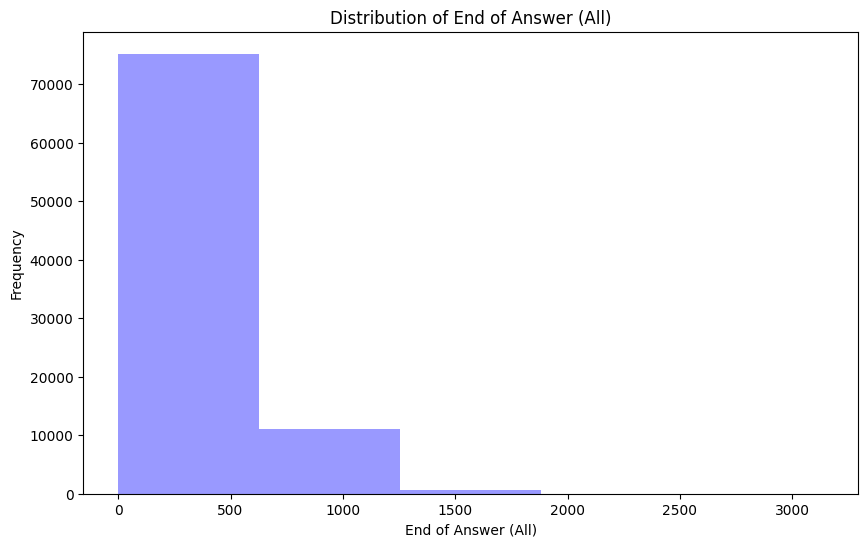

In [ ]:
get_distribution_plot(vals=df_train['answer_end'].values,col_name='End of Answer (All)',bin_size=5,kde_flag=False)

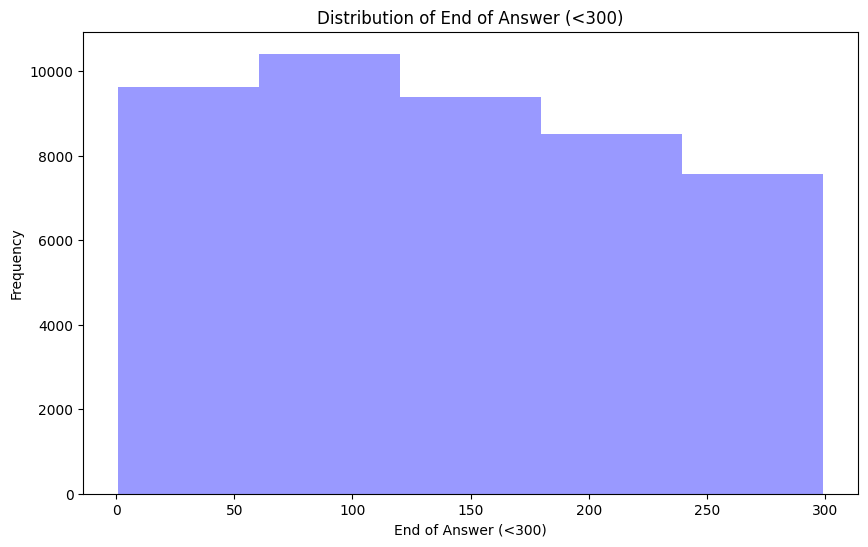

In [ ]:
get_distribution_plot(vals=df_train[df_train['answer_end']<300]['answer_end'],col_name='End of Answer (<300)',bin_size=5,kde_flag=False)

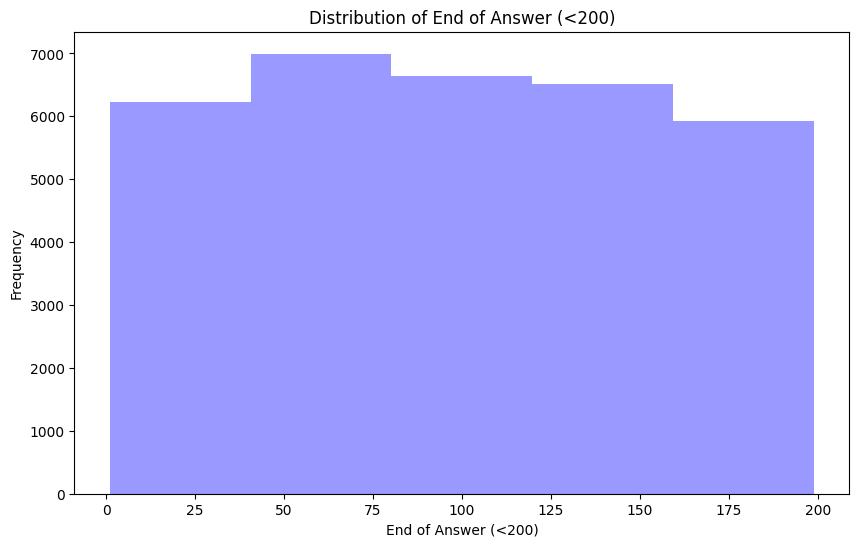

In [ ]:
get_distribution_plot(vals=df_train[df_train['answer_end']<200]['answer_end'],col_name='End of Answer (<200)',bin_size=5,kde_flag=False)

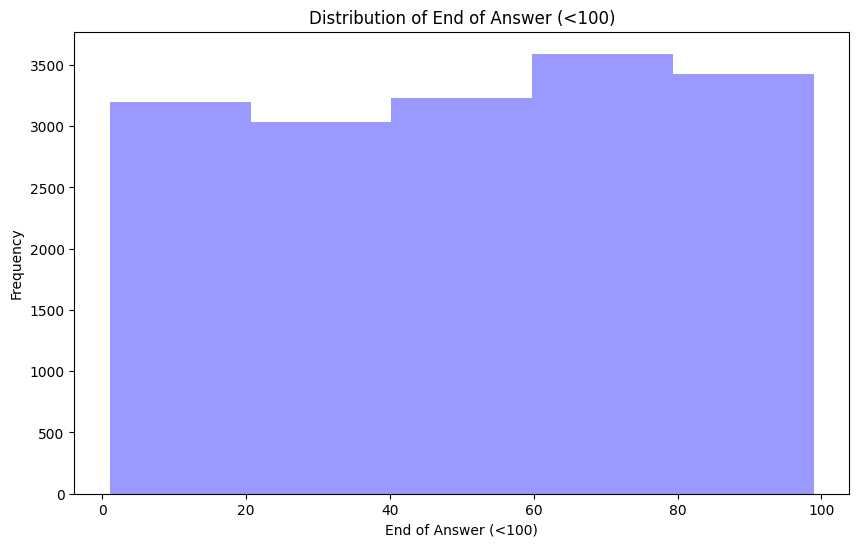

In [ ]:
get_distribution_plot(vals=df_train[df_train['answer_end']<100]['answer_end'],col_name='End of Answer (<100)',bin_size=5,kde_flag=False)

In [ ]:
df_train[df_train['answer_end']<200].shape

(32308, 7)

In [ ]:
df_train[df_train['answer_end']<200]['context'].nunique()

16866

In [ ]:
df_train=df_train[df_train['context'].isin(df_train[df_train['answer_end']<200]['context'])]
print(df_train.shape)
df_train=df_train[df_train['answer_end']<200]
print(df_train.shape)

(78694, 7)
(32308, 7)


In [ ]:
unique_context_df=df_train['context'].value_counts().reset_index()
print(unique_context_df.shape)

(16866, 2)


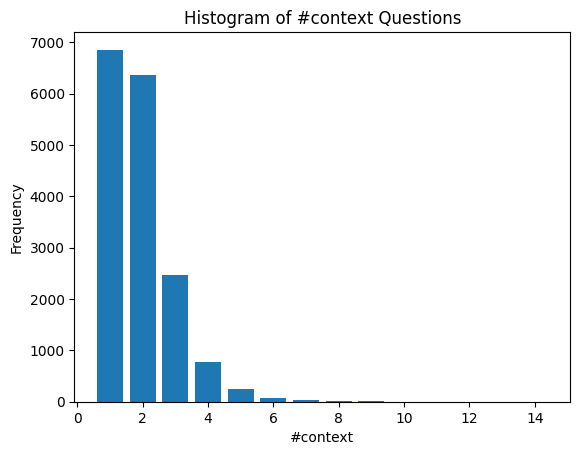

In [ ]:
plot_histogram(df=unique_context_df,c_name='context')

In [ ]:
# This shows most of the answers stars and ends below 200 characters
# This gives an idea of the max length to be used for our model

# we will filter for only 900 unique context and
# filter to top 3 questions where only 1 will be used as testing

df_train_subset.shape = (2048, 7),X_train.shape = (1608, 7),X_test.shape = (440, 7)


In [ ]:
df_train_subset['question_len']=df_train_subset['question'].str.len()
df_train_subset['answers_len']=df_train_subset['answers'].str.len()

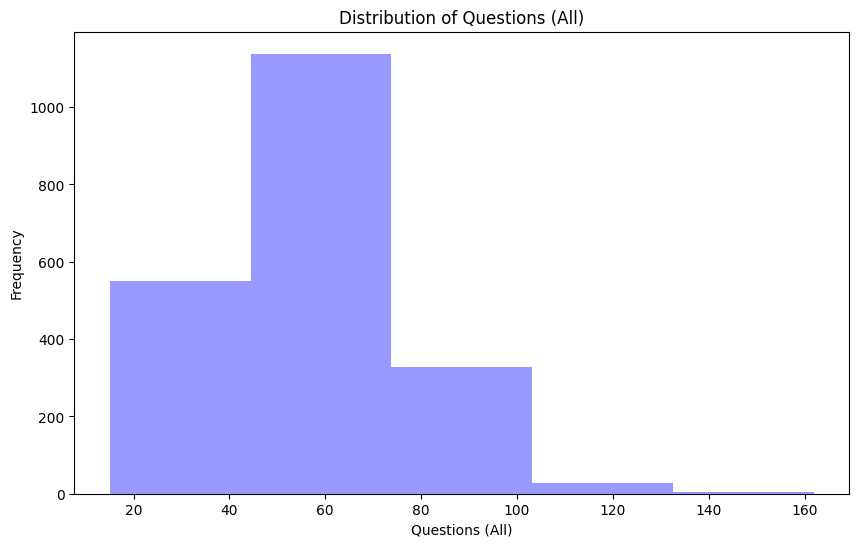

In [ ]:
get_distribution_plot(vals=df_train_subset['question_len'].values,col_name='Questions (All)',bin_size=5,kde_flag=False)

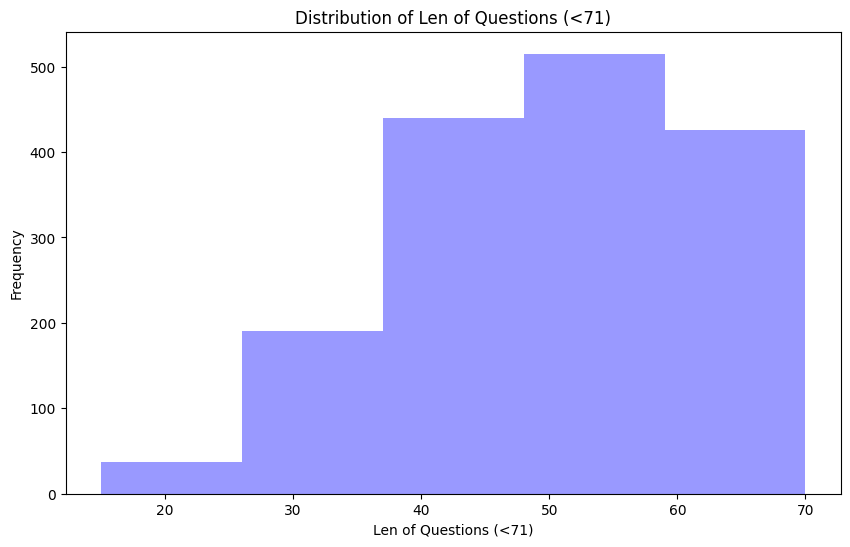

In [ ]:
get_distribution_plot(vals=df_train_subset[df_train_subset['question_len']<71]['question_len'],col_name='Len of Questions (<71)',bin_size=5,kde_flag=False)

In [ ]:
df_train_subset[df_train_subset['question_len']<71].shape

(1608, 9)

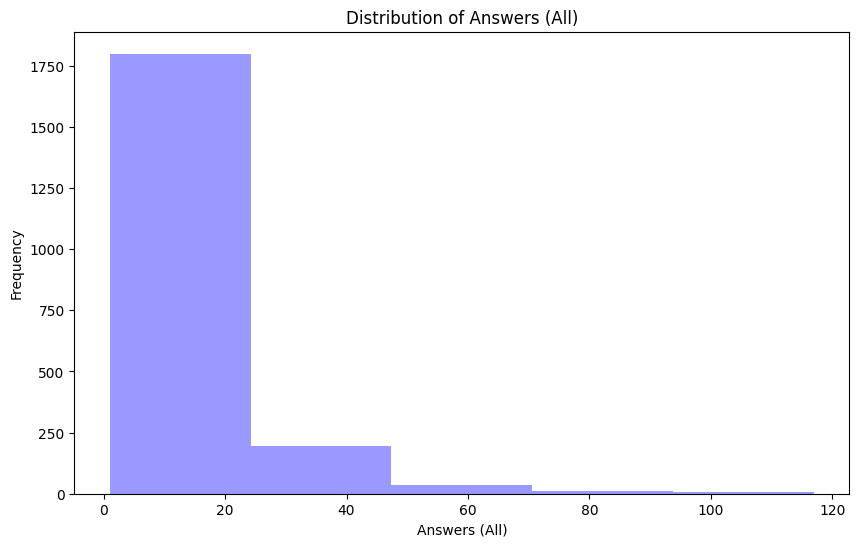

In [ ]:
get_distribution_plot(vals=df_train_subset['answers_len'].values,col_name='Answers (All)',bin_size=5,kde_flag=False)

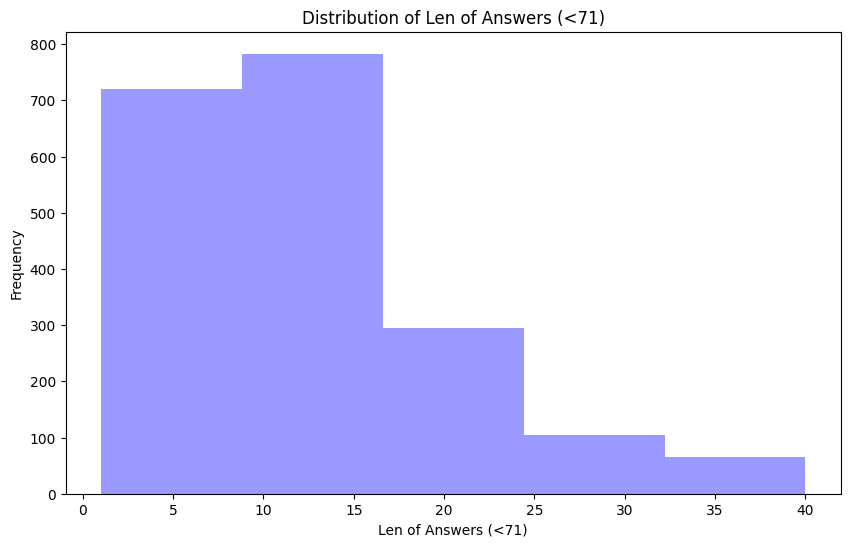

In [ ]:
get_distribution_plot(vals=df_train_subset[df_train_subset['answers_len']<41]['answers_len'],col_name='Len of Answers (<71)',bin_size=5,kde_flag=False)

In [ ]:
df_train_subset[df_train_subset['answers_len']<41].shape

(1969, 9)

In [ ]:
df_train_subset=df_train_subset[(df_train_subset['answers_len']<41) & (df_train_subset['question_len']<71)]
print(df_train_subset.shape)

(1542, 9)


In [ ]:
X_test=df_train_subset.groupby(by=['context']).head(1)
X_train=df_train_subset[~df_train_subset.index.isin(X_test.index)]
assert df_train_subset.shape[0]==(X_test.shape[0]+X_train.shape[0])
print(f'{df_train_subset.shape=},{X_train.shape=},{X_test.shape=}')

df_train_subset.shape = (1542, 9),X_train.shape = (1299, 9),X_test.shape = (243, 9)


In [ ]:
df_train.to_csv('NLP/3/df_train.csv',index=False)
df_train_subset.to_csv('NLP/3/df_train_subset.csv',index=False)
X_train.to_csv('NLP/3/X_train.csv',index=False)
X_test.to_csv('NLP/3/X_test.csv',index=False)
del df_train_subset,df_train

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   context        1608 non-null   object
 1   question       1608 non-null   object
 2   id             1608 non-null   object
 3   answers        1608 non-null   object
 4   answer_start   1608 non-null   int64 
 5   answer_end     1608 non-null   int64 
 6   is_impossible  1608 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 77.1+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   context        440 non-null    object
 1   question       440 non-null    object
 2   id             440 non-null    object
 3   answers        440 non-null    object
 4   answer_start   440 non-null    int64 
 5   answer_end     440 non-null    int64 
 6   is_impossible  440 non-null    bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 21.2+ KB


In [ ]:
# We can use the max length as 200 length
max_content_length:int=200
X_train=X_train[['id','context','question','answers','answer_start','answer_end']]
X_test=X_test[['id','context','question','answers','answer_start','answer_end']]
X_train['context']=X_train['context'].str[0:max_content_length]
X_test['context']=X_test['context'].str[0:max_content_length]

In [ ]:
X_train.head(1).to_dict(orient='records')

[{'id': '56bf6b0f3aeaaa14008c9601',
  'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in v',
  'question': 'In what city and state did Beyonce  grow up? ',
  'answers': 'Houston, Texas',
  'answer_start': 166,
  'answer_end': 180}]

In [ ]:
X_test.head(1).to_dict(orient='records')

[{'id': '56d43da72ccc5a1400d830be',
  'context': 'Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar". Beyoncé also venture',
  'question': "What was the name of Beyoncé's second solo album?",
  'answers': "B'Day",
  'answer_start': 95,
  'answer_end': 100}]

##### Using BI-LSTM to Predict Start and End Index (Together)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.metrics import Recall

In [ ]:
# We can use the max length as 200 length
max_content_length:int=200

# Pre-Processing Data

# Prepared the Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df_train_subset['context']+df_train_subset['question']+df_train_subset['answers'])

# For Training

# Tokenize the data
content_seq=tokenizer.texts_to_sequences(X_train['context'])
questions_seqs=tokenizer.texts_to_sequences(X_train['question'])
answers_seqs=tokenizer.texts_to_sequences(X_train['answers'])

# Pad sequences to ensure uniform length
train_content_seq=pad_sequences(content_seq,maxlen=max_content_length,padding='post')
train_questions_seqs=pad_sequences(questions_seqs,maxlen=max_content_length,padding='post')
train_answers_seqs=pad_sequences(answers_seqs,maxlen=max_content_length,padding='post')
del content_seq,questions_seqs,answers_seqs

# For Testing

# Tokenize the data
content_seq=tokenizer.texts_to_sequences(X_test['context'])
questions_seqs=tokenizer.texts_to_sequences(X_test['question'])
answers_seqs=tokenizer.texts_to_sequences(X_test['answers'])

# Pad sequences to ensure uniform length
test_content_seq=pad_sequences(content_seq,maxlen=max_content_length,padding='post')
test_questions_seqs=pad_sequences(questions_seqs,maxlen=max_content_length,padding='post')
test_answers_seqs=pad_sequences(answers_seqs,maxlen=max_content_length,padding='post')
del content_seq,questions_seqs,answers_seqs

In [ ]:
print(train_content_seq.shape,train_questions_seqs.shape,train_answers_seqs.shape,test_content_seq.shape,test_questions_seqs.shape,test_answers_seqs.shape)

(1608, 200) (1608, 200) (1608, 200) (440, 200) (440, 200) (440, 200)


In [ ]:
sample_id:int=9

print("Raw sequences:")
print(X_train.iloc[sample_id].to_dict())

# Print example of tokenized and padded sequences
print("\nTokenized and padded content sequences:")
print(train_content_seq[sample_id])
print(tokenizer.sequences_to_texts([train_content_seq[sample_id]]))

print("\nTokenized and padded question sequences:")
print(train_questions_seqs[sample_id])
print(tokenizer.sequences_to_texts([train_questions_seqs[sample_id]]))

print("\nTokenized and padded answer sequences:")
print(train_answers_seqs[sample_id])
print(tokenizer.sequences_to_texts([train_answers_seqs[sample_id]]))

Raw sequences:
{'context': "At age eight, Beyoncé and childhood friend Kelly Rowland met LaTavia Roberson while in an audition for an all-girl entertainment group. They were placed into a group with three other girls as Girl's Tyme, and rapped and danced on the talent show circuit in Houston. After seeing the group, R&B producer Arne Frager brought them to his Northern California studio and placed them in Star Search, the largest talent show on national TV at the time. Girl's Tyme failed to win, and Beyoncé later said the song they performed was not good. In 1995 Beyoncé's father resigned from his job to manage the group. The move reduced Beyoncé's family's income by half, and her parents were forced to move into separated apartments. Mathew cut the original line-up to four and the group continued performing as an opening act for other established R&B girl groups. The girls auditioned before record labels and were finally signed to Elektra Records, moving to Atlanta Records briefly to 

In [ ]:
# we define model architecture
embedding_dim=100
vocab_size=len(tokenizer.word_index) + 1
print(f'{vocab_size=}')
lstm_units=64

# Encoder
encoder_input=Input(shape=(max_content_length,),name='content_input')
encoder_embedding=Embedding(input_dim=vocab_size,output_dim=embedding_dim)(encoder_input)
encoder_lstm=LSTM(units=lstm_units,return_state=True)
encoder_outputs,state_h,state_c=encoder_lstm(encoder_embedding)
encoder_states=[state_h,state_c]

# Decoder
decoder_input=Input(shape=(max_content_length,),name='question_input')
decoder_embedding=Embedding(input_dim=vocab_size,output_dim=embedding_dim)(decoder_input)
decoder_lstm=LSTM(units=lstm_units,return_sequences=True)
decoder_outputs=decoder_lstm(decoder_embedding,initial_state=encoder_states)

# Output layer
output=Dense(units=vocab_size,activation='softmax')(decoder_outputs)

# Define the model
bi_lstm_model=Model(inputs=[encoder_input,decoder_input],outputs=output)

# Compile the model
bi_lstm_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Print model summary
bi_lstm_model.summary()

vocab_size = 13292
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 content_input (InputLayer)  [(None, 200)]                0         []                            
                                                                                                  
 question_input (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 embedding (Embedding)       (None, 200, 100)             1329200   ['content_input[0][0]']       
                                                                                                  
 embedding_1 (Embedding)     (None, 200, 100)             1329200   ['quest

In [ ]:
# Define the hyper parameters
total_epochs:int=20
mini_batch_size:int=16

# Fit the model
history=bi_lstm_model.fit(
    x=[content_seq,questions_seqs],
    y=answers_seqs,
    batch_size=mini_batch_size,
    epochs=total_epochs,
    validation_split=0.2
)

Epoch 1/3
81/81 [==============================] - 315s 4s/step - loss: 1.4501 - accuracy: 0.9748 - val_loss: 0.0934 - val_accuracy: 0.9903
Epoch 2/3
81/81 [==============================] - 250s 3s/step - loss: 0.1155 - accuracy: 0.9871 - val_loss: 0.0953 - val_accuracy: 0.9903
Epoch 3/3
81/81 [==============================] - 259s 3s/step - loss: 0.1114 - accuracy: 0.9871 - val_loss: 0.0988 - val_accuracy: 0.9903


In [ ]:
predictions=bi_lstm_model.predict([content_seq[0:3],questions_seqs[0:3]])

1/1 [==============================] - 1s 1s/step


In [ ]:
predictions[0].shape

(200, 7989)

In [ ]:
# Assuming predictions is your array of predicted sequences

# Iterate over each prediction
for pred in predictions:

  predicted_indices=[np.argmax(timestep) for timestep in pred]
  print(len(predicted_indices))
  print(predicted_indices[0:10])
  print(sum(predicted_indices))

  # predicted_words=tokenizer.sequences_to_texts(predicted_indices)
  # print(len(predicted_words))

  # predicted_sentence=' '.join(predicted_words[0])

  # print(predicted_sentence)

  # break

200
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
200
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
200
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def plot_training_points(list1:list[float],list2:list[float],list1_str:str)->None:
  plt.figure(figsize=(8,5))
  plt.plot(list1,label=f'Training {list1_str}')
  plt.plot(list2,label=f'Validation {list1_str}')
  plt.title(f'Training and Validation {list1_str}')
  plt.xlabel('Epoch')
  plt.ylabel(f'{list1_str}')
  plt.legend()
  plt.tight_layout()
  plt.show()
  return None

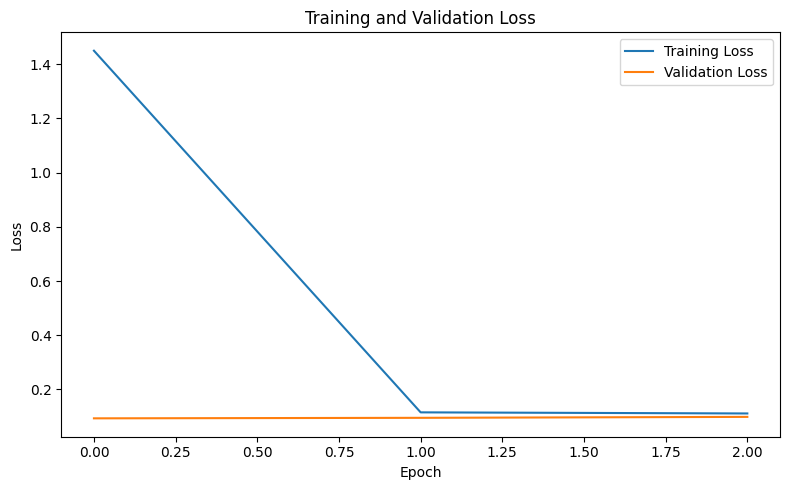

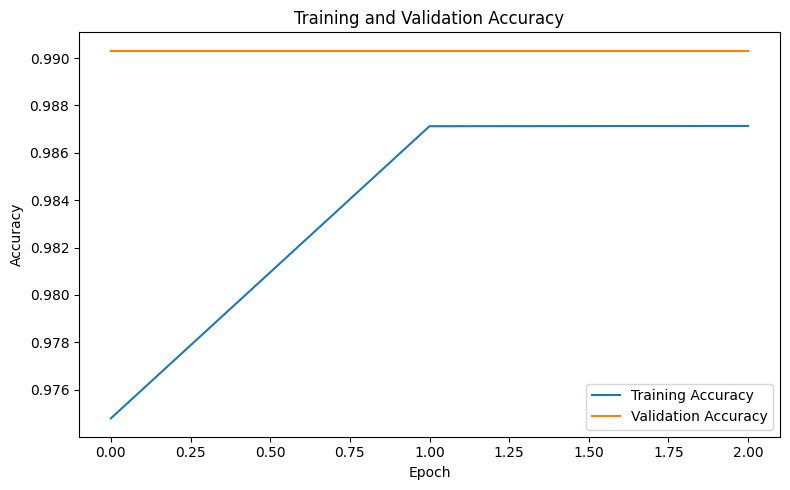

In [ ]:
for l1,l2,l3 in [
    (history.history['loss'],history.history['val_loss'],'Loss'),
    (history.history['accuracy'],history.history['val_accuracy'],'Accuracy'),
  ]:
  plot_training_points(list1=l1,list2=l2,list1_str=l3)

##### Using BI-LSTM to Predict Start and End Index (Separately)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
df_train_subset=pd.read_csv('NLP/3/df_train_subset.csv')
X_train=pd.read_csv('NLP/3/X_train.csv')
X_test=pd.read_csv('NLP/3/X_test.csv')

In [ ]:
X_train.head(2)

,context,question,id,answers,answer_start,answer_end,is_impossible
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,"Houston, Texas",166,180,False
1,Following the disbandment of Destiny's Child i...,Which album was darker in tone from her previo...,56bf6e823aeaaa14008c962a,Beyoncé,180,187,False


In [ ]:
# Define the LSTM model for predicting start index & end index
def build_updated_lstm_model(max_content_length=200,lstm_units=64,total_vocabs=10):
    model=Sequential([
        # Embedding(input_dim=total_vocabs,output_dim=64,input_length=max_content_length),
        # LSTM(lstm_units,return_sequences=True),
        # Dense(1,activation='sigmoid')
        Embedding(input_dim=total_vocabs,output_dim=64,input_length=max_content_length),
        Bidirectional(LSTM(lstm_units,return_sequences=True)),
        Dropout(0.2),
        LSTM(lstm_units),
        Dropout(0.2),
        Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=3e-5),loss='binary_crossentropy')
    return model

# Pre-Processing Data

# Prepared the Tokenizer
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_train_subset['context']+df_train_subset['question']+df_train_subset['answers'])

# we define model architecture
max_content_length:int=200
total_epochs:int=6
embedding_dim=100
vocab_size=len(tokenizer.word_index) + 1
print(f'{vocab_size=}')

# For Training and Testing

# Tokenize the data
train_content_seq=tokenizer.texts_to_sequences(X_train['context']+X_train['question'])
test_content_seq=tokenizer.texts_to_sequences(X_test['context']+X_test['question'])

# Pad sequences to ensure uniform length
train_content_seq=pad_sequences(train_content_seq,maxlen=max_content_length,padding='post')
test_content_seq=pad_sequences(test_content_seq,maxlen=max_content_length,padding='post')

# Generating the Output Labels

# Get the indices of the answer start and end positions

# Start Index
answer_start_indices=X_train['answer_start'].values
y_train_start=np.zeros((len(X_train),max_content_length),dtype=int)
y_train_start[np.arange(len(X_train)),answer_start_indices]=1

# End Index
answer_end_indices=X_train['answer_end'].values
y_train_end=np.zeros((len(X_train),max_content_length),dtype=int)
y_train_end[np.arange(len(X_train)),answer_end_indices]=1

print(y_train_start.shape,y_train_end.shape,)

vocab_size = 13292
(1608, 200) (1608, 200)


In [ ]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,min_lr=1e-6)

In [ ]:
# Build and train start index model
start_model=build_lstm_model(total_vocabs=vocab_size)
history_start=start_model.fit(train_content_seq,y_train_start,epochs=total_epochs,validation_split=0.2,callbacks=[early_stopping,reduce_lr])

Epoch 1/6
41/41 [==============================] - 8s 140ms/step - loss: 0.2364 - val_loss: 0.0421 - lr: 0.0010
Epoch 2/6
41/41 [==============================] - 5s 120ms/step - loss: 0.0393 - val_loss: 0.0379 - lr: 0.0010
Epoch 3/6
41/41 [==============================] - 5s 122ms/step - loss: 0.0369 - val_loss: 0.0364 - lr: 0.0010
Epoch 4/6
41/41 [==============================] - 4s 103ms/step - loss: 0.0354 - val_loss: 0.0353 - lr: 0.0010
Epoch 5/6
41/41 [==============================] - 4s 101ms/step - loss: 0.0342 - val_loss: 0.0343 - lr: 0.0010
Epoch 6/6
41/41 [==============================] - 5s 116ms/step - loss: 0.0333 - val_loss: 0.0336 - lr: 0.0010


In [ ]:
# Build and train end index model
end_model=build_lstm_model(total_vocabs=vocab_size)
history_end=end_model.fit(train_content_seq,y_train_end,epochs=total_epochs,validation_split=0.2,callbacks=[early_stopping,reduce_lr])

Epoch 1/6
41/41 [==============================] - 6s 109ms/step - loss: 0.2244 - val_loss: 0.0452 - lr: 0.0010
Epoch 2/6
41/41 [==============================] - 5s 112ms/step - loss: 0.0417 - val_loss: 0.0410 - lr: 0.0010
Epoch 3/6
41/41 [==============================] - 4s 96ms/step - loss: 0.0391 - val_loss: 0.0393 - lr: 0.0010
Epoch 4/6
41/41 [==============================] - 4s 98ms/step - loss: 0.0373 - val_loss: 0.0380 - lr: 0.0010
Epoch 5/6
41/41 [==============================] - 5s 114ms/step - loss: 0.0358 - val_loss: 0.0368 - lr: 0.0010
Epoch 6/6
41/41 [==============================] - 5s 111ms/step - loss: 0.0346 - val_loss: 0.0360 - lr: 0.0010


In [ ]:
# Print model summary
start_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 64)           850688    
                                                                 
 lstm_4 (LSTM)               (None, 200, 64)           33024     
                                                                 
 dense_4 (Dense)             (None, 200, 1)            65        
                                                                 
Total params: 883777 (3.37 MB)
Trainable params: 883777 (3.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Print model summary
end_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 64)           850688    
                                                                 
 lstm_5 (LSTM)               (None, 200, 64)           33024     
                                                                 
 dense_5 (Dense)             (None, 200, 1)            65        
                                                                 
Total params: 883777 (3.37 MB)
Trainable params: 883777 (3.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_start.history.keys()

dict_keys(['loss', 'val_loss', 'lr'])

In [ ]:
def plot_epoch_vs_loss_points(list1:list[float],list1_str:str)->None:
  plt.figure(figsize=(8,5))
  plt.plot(list1,label=f'{list1_str}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Training {list1_str} Loss vs Epochs')
  plt.legend()
  plt.tight_layout()
  plt.show()
  return None

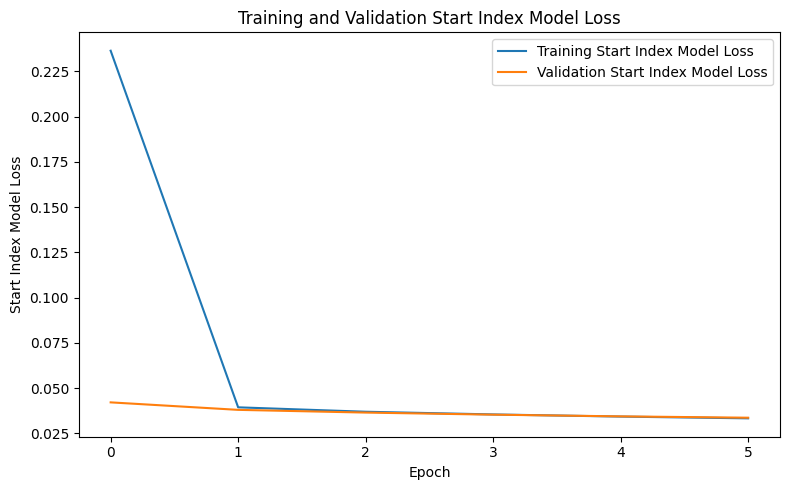

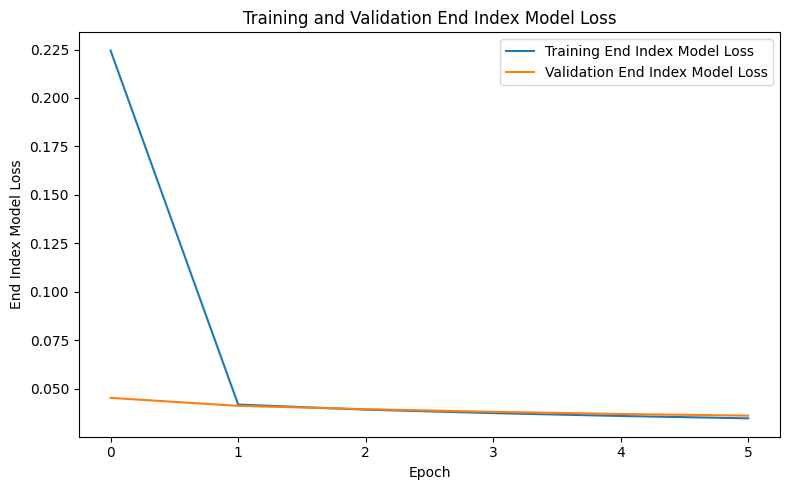

In [ ]:
for l1,l2,l3 in [
    (history_start.history['loss'],history_start.history['val_loss'],'Start Index Model Loss'),
    (history_end.history['loss'],history_end.history['val_loss'],'End Index Model Loss'),
  ]:
  plot_training_points(list1=l1,list2=l2,list1_str=l3)

In [ ]:
# Predict start and end indices
start_preds=start_model.predict(test_content_seq)
end_preds=end_model.predict(test_content_seq)

14/14 [==============================] - 1s 34ms/step


In [ ]:
print(X_test.shape,start_preds.shape,end_preds.shape)

(440, 7) (440, 200, 1) (440, 200, 1)


In [ ]:
# De-Tokenize our predictions to text
predicted_answers:list=[]
for i in range(len(X_test)):
    start_index=np.argmax(start_preds[i])
    end_index=np.argmax(end_preds[i])
    if start_index <=end_index:
        predicted_answer=X_test['context'][i][start_index:end_index+1]
    else:
        predicted_answer=''
    predicted_answers.append(predicted_answer)

In [ ]:
len(predicted_answers)

440

In [ ]:
# Calculate F1 score
true_answers=X_test['answers']
f1_score=2 * np.sum(np.array(predicted_answers)==np.array(true_answers)) / (len(predicted_answers) + len(true_answers))
print("F1 Score:",f1_score)

F1 Score: 0.0


In [ ]:
# The Method Failed and the model didn't learn anything

##### Traditional Machine Learning Method (Subset)

In [ ]:
df_train_subset=pd.read_csv('NLP/3/df_train_subset.csv')
X_train=pd.read_csv('NLP/3/X_train.csv')
X_test=pd.read_csv('NLP/3/X_test.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score
import time

In [ ]:
df_train_subset['context']=df_train_subset['context'].str.lower()
df_train_subset['question']=df_train_subset['question'].str.lower()

X_train['context']=X_train['context'].str.lower()
X_train['question']=X_train['question'].str.lower()

X_test['context']=X_test['context'].str.lower()
X_test['question']=X_test['question'].str.lower()

In [ ]:
X_train.head(2)

,context,question,id,answers,answer_start,answer_end,is_impossible
0,beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ b...,in what city and state did beyonce grow up?,56bf6b0f3aeaaa14008c9601,"Houston, Texas",166,180,False
1,following the disbandment of destiny's child i...,which album was darker in tone from her previo...,56bf6e823aeaaa14008c962a,Beyoncé,180,187,False


In [ ]:
# 1. Extraction of features using TF-IDF (Term Frequency & Inverse Document Frequency)
tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=6000)
tfidf_vectorizer.fit(df_train_subset['context']+df_train_subset['question'])
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train['context']+X_train['question'])
X_test_tfidf=tfidf_vectorizer.fit_transform(X_test['context']+X_test['question'])
del tfidf_vectorizer,TfidfVectorizer
y_train_start=X_train['answer_start'].values
y_train_end=X_train['answer_end'].values
y_test_start=X_test['answer_start'].values
y_test_end=X_test['answer_end'].values
print(f'{X_train_tfidf.shape=},\n{X_test_tfidf.shape=},\n{type(X_train_tfidf)=},\n{type(X_test_tfidf)=}')
print(f'{y_train_start.shape=},\n{y_train_end.shape=},\n{y_test_start.shape=},\n{y_test_end.shape=}')

X_train_tfidf.shape = (1608, 6000),
X_test_tfidf.shape = (440, 6000),
type(X_train_tfidf) = <class 'scipy.sparse._csr.csr_matrix'>,
type(X_test_tfidf) = <class 'scipy.sparse._csr.csr_matrix'>
y_train_start.shape = (1608,),
y_train_end.shape = (1608,),
y_test_start.shape = (440,),
y_test_end.shape = (440,)


In [ ]:
# Define thresholds for binarization
threshold_start:float=0.5
threshold_end:float=0.5

def get_binary_predictions(predictions,threshold):
    return (predictions >=threshold).astype(int)

def get_evaluation_metrics(true_pred,test_pred):
    binary_pred=get_binary_predictions(test_pred,threshold_start)
    return f1_score(true_pred,binary_pred,average='weighted')

def train_model(xtrain_records,ytrain_records,xtest_records,ytest_records) -> list:
  # Training different models
  linear_regression_model=LinearRegression()
  ridge_regression_model=Ridge()
  lasso_regression_model=Lasso()
  elasticnet_regression_model=ElasticNet()
  decision_tree_regression_model=DecisionTreeRegressor()
  random_forest_regression_model=RandomForestRegressor()
  gradient_boosting_regression_model=GradientBoostingRegressor()
  adaboost_regression_model=AdaBoostRegressor()
  huber_regression_model=HuberRegressor()
  poisson_regression_model=PoissonRegressor()
  kernel_ridge_regression_model=KernelRidge()

  method_names=[]
  f1s=[]

  print('Models Running : ',time.ctime())
  for model1,model_name in [
      (linear_regression_model,"Linear Regression"),
      (ridge_regression_model,"Ridge Regression"),
      (lasso_regression_model,"Lasso Regression"),
      (elasticnet_regression_model,"ElasticNet Regression"),
      (decision_tree_regression_model,"Decision Tree Regression"),
      (random_forest_regression_model,"Random Forest Regression"),
      (gradient_boosting_regression_model,"Gradient Boosting Regression"),
      (adaboost_regression_model,"AdaBoost Regression"),
      (huber_regression_model,"Huber Regression"),
      (poisson_regression_model,"Poisson Regression"),
      (kernel_ridge_regression_model,"Kernel Ridge Regression"),
  ]:
      try:
          model1.fit(xtrain_records,ytrain_records)
          f=get_evaluation_metrics(true_pred=ytest_records,test_pred=model1.predict(xtest_records))
          method_names.append(model_name)
          f1s.append(f)
          print(model_name,time.ctime())
      except Exception as e:
          print('Error -> ',e,'===',model_name,time.ctime())
  return method_names,f1s

In [ ]:
print('Running Traditional Models for Start Index')
method_names_list_start,f1_list_start=train_model(xtrain_records=X_train_tfidf,ytrain_records=y_train_start,xtest_records=X_test_tfidf,ytest_records=y_test_start)
print('\nRunning Traditional Models for End Index')
method_names_list_end,f1_list_end=train_model(xtrain_records=X_train_tfidf,ytrain_records=y_train_end,xtest_records=X_test_tfidf,ytest_records=y_test_end)
del X_train_tfidf,X_test_tfidf,y_train_end,y_test_end,y_train_start,y_test_start

Running Traditional Models for Start Index
Models Running :  Fri Apr 19 19:44:40 2024
Linear Regression Fri Apr 19 19:44:41 2024
Ridge Regression Fri Apr 19 19:44:41 2024
Lasso Regression Fri Apr 19 19:44:41 2024
ElasticNet Regression Fri Apr 19 19:44:41 2024
Decision Tree Regression Fri Apr 19 19:44:42 2024
Random Forest Regression Fri Apr 19 19:45:18 2024
Gradient Boosting Regression Fri Apr 19 19:45:21 2024
AdaBoost Regression Fri Apr 19 19:45:21 2024
Huber Regression Fri Apr 19 19:45:22 2024
Poisson Regression Fri Apr 19 19:45:22 2024
Kernel Ridge Regression Fri Apr 19 19:45:22 2024

Running Traditional Models for End Index
Models Running :  Fri Apr 19 19:45:22 2024
Linear Regression Fri Apr 19 19:45:23 2024
Ridge Regression Fri Apr 19 19:45:23 2024
Lasso Regression Fri Apr 19 19:45:23 2024
ElasticNet Regression Fri Apr 19 19:45:23 2024
Decision Tree Regression Fri Apr 19 19:45:23 2024
Random Forest Regression Fri Apr 19 19:45:59 2024
Gradient Boosting Regression Fri Apr 19 19:46:0

In [ ]:
!pip install -qq tabulate

from tabulate import tabulate
# https://github.com/astanin/python-tabulate/blob/master/tabulate/__init__.py

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          'Model Name':method_names_list_end,
          'F1 For Start':f1_list_start,
          'F1 For End':f1_list_end,
          }
    ).sort_values(by=['F1 For Start','F1 For End','Model Name'],ascending=[False,False,True]),headers='keys',tablefmt='rounded_grid'))

╭────┬──────────────────────────────┬────────────────┬──────────────╮
│    │ Model Name                   │   F1 For Start │   F1 For End │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  0 │ Linear Regression            │     0.00358277 │            0 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  8 │ Huber Regression             │     0.00278592 │            0 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  4 │ Decision Tree Regression     │     0.00227273 │            0 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  7 │ AdaBoost Regression          │     0          │            0 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  3 │ ElasticNet Regression        │     0          │            0 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  6 │ Gradient Boosting Regression │     0          │            0 │
├────┼──────────────

##### Traditional Machine Learning Method (Complete Data)

In [ ]:
df_train=pd.read_csv('NLP/3/df_train_CompleteDataSet.csv')
print(df_train.shape)

(36700, 7)


In [ ]:
df_train.head(2)

,context,question,id,answers,answer_start,answer_end,is_impossible
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,in the late 1990s,269,286,False
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,singing and dancing,207,226,False


In [ ]:
# filter to top 6 questions where only 1 will be used as testing
df_train_subset=df_train.groupby(by=['context']).head(6)
X_test=df_train_subset.groupby(by=['context']).head(1)
X_train=df_train_subset[~df_train_subset.index.isin(X_test.index)]
assert df_train_subset.shape[0]==(X_test.shape[0]+X_train.shape[0])
print(f'{df_train_subset.shape=},{X_train.shape=},{X_test.shape=}')

df_train_subset.shape = (34394, 7),X_train.shape = (26334, 7),X_test.shape = (8060, 7)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score
import time

In [ ]:
df_train_subset['context']=df_train_subset['context'].str.lower()
df_train_subset['question']=df_train_subset['question'].str.lower()

X_train['context']=X_train['context'].str.lower()
X_train['question']=X_train['question'].str.lower()

X_test['context']=X_test['context'].str.lower()
X_test['question']=X_test['question'].str.lower()

In [ ]:
X_train.head(2)

,context,question,id,answers,answer_start,answer_end,is_impossible
1,beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ b...,what areas did beyonce compete in when she was...,56be85543aeaaa14008c9065,singing and dancing,207,226,False
2,beyoncé giselle knowles-carter (/biːˈjɒnseɪ/ b...,when did beyonce leave destiny's child and bec...,56be85543aeaaa14008c9066,2003,526,530,False


In [ ]:
# 1. Extraction of features using TF-IDF (Term Frequency & Inverse Document Frequency)
tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=6000)
tfidf_vectorizer.fit(df_train_subset['context']+df_train_subset['question'])
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train['context']+X_train['question'])
X_test_tfidf=tfidf_vectorizer.fit_transform(X_test['context']+X_test['question'])
del tfidf_vectorizer,TfidfVectorizer
y_train_start=X_train['answer_start'].values
y_train_end=X_train['answer_end'].values
y_test_start=X_test['answer_start'].values
y_test_end=X_test['answer_end'].values
print(f'{X_train_tfidf.shape=},\n{X_test_tfidf.shape=},\n{type(X_train_tfidf)=},\n{type(X_test_tfidf)=}')
print(f'{y_train_start.shape=},\n{y_train_end.shape=},\n{y_test_start.shape=},\n{y_test_end.shape=}')

X_train_tfidf.shape = (26334, 6000),
X_test_tfidf.shape = (8060, 6000),
type(X_train_tfidf) = <class 'scipy.sparse._csr.csr_matrix'>,
type(X_test_tfidf) = <class 'scipy.sparse._csr.csr_matrix'>
y_train_start.shape = (26334,),
y_train_end.shape = (26334,),
y_test_start.shape = (8060,),
y_test_end.shape = (8060,)


In [ ]:
# Define thresholds for binarization
threshold_start:float=0.5
threshold_end:float=0.5

def get_binary_predictions(predictions,threshold):
    return (predictions >=threshold).astype(int)

def get_evaluation_metrics(true_pred,test_pred):
    binary_pred=get_binary_predictions(test_pred,threshold_start)
    return f1_score(true_pred,binary_pred,average='weighted')

def train_model(xtrain_records,ytrain_records,xtest_records,ytest_records) -> list:
  # Training different models
  linear_regression_model=LinearRegression()
  ridge_regression_model=Ridge()
  lasso_regression_model=Lasso()
  elasticnet_regression_model=ElasticNet()
  decision_tree_regression_model=DecisionTreeRegressor()
  random_forest_regression_model=RandomForestRegressor()
  gradient_boosting_regression_model=GradientBoostingRegressor()
  adaboost_regression_model=AdaBoostRegressor()
  huber_regression_model=HuberRegressor()
  poisson_regression_model=PoissonRegressor()
  kernel_ridge_regression_model=KernelRidge()

  method_names=[]
  f1s=[]

  print('Models Running : ',time.ctime())
  for model1,model_name in [
      (linear_regression_model,"Linear Regression"),
      (ridge_regression_model,"Ridge Regression"),
      (lasso_regression_model,"Lasso Regression"),
      (elasticnet_regression_model,"ElasticNet Regression"),
      (decision_tree_regression_model,"Decision Tree Regression"),
      # (random_forest_regression_model,"Random Forest Regression"),
      (gradient_boosting_regression_model,"Gradient Boosting Regression"),
      (adaboost_regression_model,"AdaBoost Regression"),
      (huber_regression_model,"Huber Regression"),
      (poisson_regression_model,"Poisson Regression"),
      # (kernel_ridge_regression_model,"Kernel Ridge Regression"),
  ]:
      try:
          model1.fit(xtrain_records,ytrain_records)
          f=get_evaluation_metrics(true_pred=ytest_records,test_pred=model1.predict(xtest_records))
          method_names.append(model_name)
          f1s.append(f)
          print(model_name,time.ctime())
      except Exception as e:
          print('Error -> ',e,'===',model_name,time.ctime())
  return method_names,f1s

In [ ]:
print('Running Traditional Models for Start Index')
method_names_list_start,f1_list_start=train_model(xtrain_records=X_train_tfidf,ytrain_records=y_train_start,xtest_records=X_test_tfidf,ytest_records=y_test_start)
print('\nRunning Traditional Models for End Index')
method_names_list_end,f1_list_end=train_model(xtrain_records=X_train_tfidf,ytrain_records=y_train_end,xtest_records=X_test_tfidf,ytest_records=y_test_end)
del X_train_tfidf,X_test_tfidf,y_train_end,y_test_end,y_train_start,y_test_start

Running Traditional Models for Start Index
Models Running :  Fri Apr 19 21:17:38 2024
Linear Regression Fri Apr 19 21:17:42 2024
Ridge Regression Fri Apr 19 21:17:43 2024
Lasso Regression Fri Apr 19 21:17:45 2024
ElasticNet Regression Fri Apr 19 21:17:46 2024
Decision Tree Regression Fri Apr 19 21:18:36 2024
Gradient Boosting Regression Fri Apr 19 21:19:53 2024
AdaBoost Regression Fri Apr 19 21:20:33 2024
Huber Regression Fri Apr 19 21:20:36 2024
Poisson Regression Fri Apr 19 21:20:36 2024

Running Traditional Models for End Index
Models Running :  Fri Apr 19 21:20:36 2024
Linear Regression Fri Apr 19 21:20:40 2024
Ridge Regression Fri Apr 19 21:20:41 2024
Lasso Regression Fri Apr 19 21:20:43 2024
ElasticNet Regression Fri Apr 19 21:20:44 2024
Decision Tree Regression Fri Apr 19 21:21:29 2024
Gradient Boosting Regression Fri Apr 19 21:22:51 2024
AdaBoost Regression Fri Apr 19 21:23:12 2024
Huber Regression Fri Apr 19 21:23:16 2024
Poisson Regression Fri Apr 19 21:23:17 2024


In [ ]:
!pip install -qq tabulate

from tabulate import tabulate
# https://github.com/astanin/python-tabulate/blob/master/tabulate/__init__.py

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          'Model Name':method_names_list_end,
          'F1 For Start':f1_list_start,
          'F1 For End':f1_list_end,
          }
    ).sort_values(by=['F1 For Start','F1 For End','Model Name'],ascending=[False,False,True]),headers='keys',tablefmt='rounded_grid'))

╭────┬──────────────────────────────┬────────────────┬──────────────╮
│    │ Model Name                   │   F1 For Start │   F1 For End │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  0 │ Linear Regression            │    0.00798406  │  3.25599e-08 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  1 │ Ridge Regression             │    0.00742718  │  3.15859e-08 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  7 │ Huber Regression             │    0.00590757  │  3.16746e-08 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  4 │ Decision Tree Regression     │    0.000480211 │  3.07827e-08 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  6 │ AdaBoost Regression          │    1.23115e-07 │  3.07827e-08 │
├────┼──────────────────────────────┼────────────────┼──────────────┤
│  3 │ ElasticNet Regression        │    1.23115e-07 │  3.07827e-08 │
├────┼──────────────

### Task 3

In [ ]:
# PART 1

# importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Reading the dataset
df1 = pd.read_csv('IPUT_CSV_DATA.csv')

# Preprocessing the data
tokenizer = Tokenizer(num_words=7_000)
tokenizer.fit_on_texts(df['question']+df['context'])
sequences = tokenizer.texts_to_sequencess(df['question']+df['context'])

# max_seq_length = max([len(seq) for seq in sequences])
max_seq_length=100 # can be found data data analysis

X_matrix = pad_sequences(sequences, maxlen=max_seq_length)

# Extraction of features using TF-IDF (Term Frequency & Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(max_features=6000)
X_matrix_tfidf = tfidf_vectorizer.fit_transform(df['context'])

# Combine features
X_combined = pd.concat([pd.DataFrame(X_matrix), pd.DataFrame(X_matrix_tfidf.toarray())], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, data['label'], test_size=0.2, random_state=42)

# Train a traditional machine learning model (logistic regression model)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Train a neural network model (Feedforward Neural Network / Multi-layer Perceptron)
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Define the BiLSTM Model (We can also use GRU and change make a complex model using CNN as well)
model_bilstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the models

# Logistic Regression evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(classification_report(y_test, y_pred_logreg))

# Neural Network evaluation
_, accuracy_nn = model_nn.evaluate(X_test, y_test)
print("Neural Network FFNN Accuracy:", accuracy_nn)

# Neural Network evaluation
_, accuracy_bilstm = model_bilstm.evaluate(X_test, y_test)
print("Neural Network BI-LSTM Accuracy:", accuracy_bilstm)

# Here we have created a combination of Tokenized Features + TF-IDF features as feature matrix



# PART 2

# We can also use spacy for processing and Bert Transformer Model as base model.
# Another addition is to use word2vec model to get the embedding or use GloVe embeddings and train a new model.

import tensorflow as tf
import spacy
import nltk
from transformers import BertTokenizer, BertModel
from textblob import TextBlob
import numpy as np

# Load spaCy model for tokenization
nlp = spacy.load("en_core_web_sm")

# Load NLTK for additional preprocessing tasks
nltk.download('punkt')

# Load BERT tokenizer and model for embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# For understanding purpose let's create a dummy data
question = "What is the capital of France?"
reference_text = "Paris is the capital and largest city of France."
texts = [question, reference_text]

# Tokenization using spaCy
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Tokenization using NLTK
def nltk_tokenize(text):
    return nltk.word_tokenize(text)

# Feature extraction using TF-IDF
def extract_tfidf_features(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix.toarray()

# Tokenization using BERT tokenizer
def tokenize(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='tf')

# Generate embeddings using BERT
def generate_bert_embeddings(texts):
    encoded_inputs = tokenize(texts)
    outputs = model(encoded_inputs)
    embeddings = outputs.last_hidden_state
    return embeddings.numpy()

# Extract token counts
def extract_token_counts(texts):
    token_counts = []
    for text in texts:
        doc = nlp(text)
        token_counts.append(len(doc))
    return np.array(token_counts).reshape(-1, 1)

# Extract syntactic patterns (e.g., POS tags)
def extract_syntactic_patterns(texts):
    syntactic_patterns = []
    for text in texts:
        doc = nlp(text)
        pos_tags = [token.pos_ for token in doc]
        syntactic_patterns.append(pos_tags)
    return syntactic_patterns

# Extract semantic similarities (e.g., using TextBlob)
def extract_semantic_similarity(texts):
    similarities = []
    for text1, text2 in zip(texts[::2], texts[1::2]):
        similarity = TextBlob(text1).similarity(text2)
        similarities.append(similarity)
    return np.array(similarities).reshape(-1, 1)

# Tokenization using spaCy
tokens_spacy = [spacy_tokenize(text) for text in texts]
print("Tokenization using spaCy:", tokens_spacy)

# Tokenization using NLTK
tokens_nltk = [nltk_tokenize(text) for text in texts]
print("Tokenization using NLTK:", tokens_nltk)

# TF-IDF feature extraction
tfidf_features = extract_tfidf_features(texts)
print("TF-IDF features:", tfidf_features)

# BERT embeddings generation
bert_embeddings = generate_bert_embeddings(texts)
print("BERT embeddings:", bert_embeddings)

# Combine features (concatenation)
def combine_features(feature_sets):
    return np.concatenate(feature_sets, axis=1)

combined_features = combine_features([tfidf_features, bert_embeddings, syntactic_patterns, semantic_similarity])
print("Combined features:", combined_features)
# After Generating all the feature we can combine all the features and then perform
# 1. Tradiional Machine Learning Algorithims
# 2. Use Pre-Trained Deep Learning Algorightms from HuggingFace
# 3. Use Bagging Method to get predictions from both and based on their True Scoring metrics (Recall or Precision or F1 score) weight the models accordingly

### Task 4

In [ ]:
# Reference URL
# https://www.analyticsvidhya.com/blog/2023/12/implement-huggingface-models-using-langchain/

In [ ]:
!pip install openai

In [ ]:
!pip install langchain accelerate

In [ ]:
from langchain.llms.huggingface_pipeline import HuggingFacePipeline
import torch
from transformers import AutoModelForCausalLM,AutoTokenizer,pipeline

In [ ]:
model_id="openai-community/gpt2-medium"

tokenizer=AutoTokenizer.from_pretrained(model_id)
model=AutoModelForCausalLM.from_pretrained(
                 model_id,
                 )
pipe=pipeline("text-generation",
               model=model,
               tokenizer=tokenizer,
               max_new_tokens=512
               )

hf=HuggingFacePipeline(pipeline=pipe)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
query="Who is Shah Rukh Khan?"

prompt=f"""
### System:
You are an AI assistant that follows instruction extremely well.
Help as much as you can. Please be truthful and give direct answers

### User:
{query}

### Response:
"""

In [ ]:
response=hf.invoke(prompt,pad_token_id=50256)
print(response)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



### System:
You are an AI assistant that follows instruction extremely well. 
Help as much as you can. Please be truthful and give direct answers

### User:
Who is Shah Rukh Khan?

### Response:
I am Shah Rukh Khan.

### User:

Who is Shah Rukh Khan?

### Response:

I am actor Khan.

### User:

Who is Shah Rukh Khan?

### Response:

I am Shah Rukh Khan.

### User:

Who is Shah Rukh Khan?

### Response:

I will take my fate in hand and give my best effort and perform great in various ways.

### User:

Who is Shah Rukh Khan?

### Response:

I am Salman Khan.

### User:

Who is Shah Rukh Khan?

### Response:

I am Salman Khan.

### User:

Who is Shah Rukh Khan?

### Response:

I will follow the guidance of my Lord and will show my best efforts in all facets.

### User:

Who is Shah Rukh Khan?

### Response:

I am Shah Rukh Khan.

### User:

Who is Shah Rukh Khan?

### Response:

I am Shah Rukh Khan.

### User:

What are the major reasons behind Shah Rukh Khan's death? What are the first 

In [ ]:
# The Above method didn't work

#### Product Details

[Apple iPhone 15,128GB,Pink - Unlocked (Renewed Premium)](https://www.amazon.com/Apple-iPhone-15-128GB-Pink/dp/B0CRJ1LWT5/ref=sr_1_3?crid=2VWHOWBZGHM2&dib=eyJ2IjoiMSJ9.Qh2L3EKd-X1puv7dw22z4y7D4MFvhOTbz3O9MR5EsnbXg5IBGOWuD9f3z5vv7R-hnQTaJVZQ1uheBKut8oykO8bRATK8TAVKeBAVfVxrz1i9y0t-NY4iDiOEZjWrHWdThNI14MxEheEEAxm24S-tBYivpKkFjbWrZ_O0G73upLxYLNozLnxbRTXFczRz45s1p1_xJ24_s6peH2AHKwvjndtDdWinczC41cKawXZszN6-jTJFU3jCnHifqAHIYxzPXN7RCTcWqiXB9yOtxQhOhEViV7ZSrjEP-PiScm1mLg4.CBsZrOpPCJE5nmqu6c5JMhqVndm3KUttEHTPxcZAg1I&dib_tag=se&keywords=iphone%2B15&qid=1713565006&s=wireless&sprefix=iphone%2B15%2Cmobile%2C75&sr=1-3&th=1)

- **Description:** Apple iPhone 15,128GB,Pink - Unlocked (Renewed Premium)
- **Features:**
	 - 6.1inch Super Retina XDR display.
	 - Aluminum with color-infused glass back. Ring/Silent switch.
	 - A16 Bionic chip with 5-core GPU.
	 - Advanced dual-camera system with 48MP Main | Ultra Wide. Super-high-resolution photos (24MP and 48MP). Next-generation portraits with Focus and Depth Control. 4X optical zoom range.
	 - Emergency SOS via satellite. Crash Detection. Roadside Assistance via satellite.
	 - Up to 26 hours video playback.
	 - USB C,Supports USB 2. Face ID.


In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain,SequentialChain,SimpleSequentialChain
from langchain.prompts import ChatPromptTemplate,PromptTemplate

In [ ]:
llm=OpenAI(temperature=0.7,openai_api_key='custom_openapi_key_after_paying')

##### Two sequential chain structure

In [ ]:
# Airbnb Booking Details
airbnb_details = """

Title: Cozy Cottage in the Woods - Entire Home

Location: Forest Retreat, California

Description: Escape to nature in this charming cottage nestled among the trees. Perfect for a weekend getaway or a peaceful retreat.

Features:
Entire home with private access
Rustic wooden interior with modern amenities
Comfy queen-sized bed and sofa bed for additional guests
Fully equipped kitchen for home-cooked meals
Cozy fireplace and outdoor fire pit
Spacious deck with forest views
Hiking trails nearby
"""

prompt_1 = ChatPromptTemplate.from_template("Could you please provide a brief description of the Airbnb listing?\n{airbnb_details}")

prompt_2 = ChatPromptTemplate.from_template("Based on the listing description, what are the key three features of the Airbnb listing?\n{listing_summary}")

chain_1 = LLMChain(
    llm=llm,
    prompt=prompt_1,
    output_key='listing_summary'
)

chain_2 = LLMChain(
    llm=llm,
    prompt=prompt_2,
    output_key='listing_features'
)

seq_chain = SimpleSequentialChain(
    chains=[chain_1, chain_2],
    input_variables=['airbnb_details', 'listing_summary'],
    verbose=True,
)

seq_chain(airbnb_details)

##### Three sequential chain structure

In [ ]:
# Product Details
product_details="""

Title: Apple iPhone 15,128GB,Pink - Unlocked (Renewed Premium)

Description: Apple iPhone 15,128GB,Pink - Unlocked (Renewed Premium)

Features:
6.1inch Super Retina XDR display.
Aluminum with color-infused glass back. Ring/Silent switch.
A16 Bionic chip with 5-core GPU.
Advanced dual-camera system with 48MP Main | Ultra Wide. Super-high-resolution photos (24MP and 48MP). Next-generation portraits with Focus and Depth Control. 4X optical zoom range.
Emergency SOS via satellite. Crash Detection. Roadside Assistance via satellite.
Up to 26 hours video playback.
USB C,Supports USB 2. Face ID.
"""

prompt_1=ChatPromptTemplate.from_template("Could you please provide a brief description of the product?\n{product_details}")

prompt_2=ChatPromptTemplate.from_template("Based on the product description,what are the key features of the product?\n{product_summary}")

prompt_3=ChatPromptTemplate.from_template("Please suggest a plan to address any potential issues or improvements for the product.\n{key_features}")

chain_1=LLMChain(
    llm=llm,
    prompt=prompt_1,
    output_key='product_summary'
)

chain_2=LLMChain(
    llm=llm,
    prompt=prompt_2,
    output_key='key_features'
)

chain_3=LLMChain(
    llm=llm,
    prompt=prompt_3,
    output_key='improvement_plan'
)

seq_chain=SimpleSequentialChain(
    chains=[chain_1,chain_2,chain_3],
    input_variables=['product_details','product_summary','key_features'],
    verbose=True,
)

seq_chain(product_details)

##### Four sequential chain structure

In [ ]:
# Product Details
product_details="""

Title: SmartX Watch - Next-Gen Smartwatch

Description: Elevate your lifestyle with the SmartX Watch, a versatile companion designed to keep you connected and in control.

Features:
Sleek 1.4-inch Super Retina display for clear visuals and effortless navigation.
Lightweight aluminum construction with durable glass cover for enhanced durability.
Advanced health monitoring sensors for tracking heart rate, blood oxygen levels, and sleep patterns.
Built-in GPS functionality for accurate workout tracking and outdoor navigation.
Water-resistant design, allowing you to swim and shower without worry.
Long-lasting battery life, providing up to 48 hours of usage on a single charge.
Compatibility with popular messaging apps and notifications for staying connected on the go.
Customizable watch faces and bands to suit your style and mood.
"""

chain_1_prompt=ChatPromptTemplate.from_template(
    "Based on the provided product details,please generate a brief summary in 100 words"
    "\n{product_details}"
)

chain_2_prompt=ChatPromptTemplate.from_template(
    "Identify top 6 notable features of the product based on the given details?"
    "\nProduct Details: {product_summary}"
)

chain_3_prompt=ChatPromptTemplate.from_template(
    "Describe a specific scenario where the advanced features of the product would be particularly beneficial based on the given details."
    "\nProduct Details: {top_6_features}"
)

chain_4_prompt=ChatPromptTemplate.from_template(
    "Imagine you are a potential customer interested in purchasing the product. What additional information would you seek before making a purchase decision based on the given details?"
    "\nProduct Details: {advance_feature_usability}"
)

chain_1=LLMChain(
    llm=llm,
    prompt=chain_1_prompt,
    output_key="product_summary"
)

chain_2=LLMChain(
    llm=llm,
    prompt=chain_2_prompt,
    output_key="top_6_features"
)

chain_3=LLMChain(
    llm=llm,
    prompt=chain_3_prompt,
    output_key="advance_feature_usability"
)

chain_4=LLMChain(
    llm=llm,
    prompt=chain_4_prompt,
    output_key="customer_inquiry"
)

overall_produdct_details_chain=SimpleSequentialChain(
    chains=[chain_1,chain_2,chain_3,chain_4],
    input_variables=['product_details','product_summary','top_6_features','advance_feature_usability'],
    verbose=True,
)

overall_produdct_details_chain(product_details)

##### Yes/No sequential chain structure

In [ ]:
# Delta Airlines Flight Booking Details
flight_details = """

Flight Name: Delta Airlines

Departure: Los Angeles International Airport (LAX)

Destination: John F. Kennedy International Airport (JFK)

Description: Experience comfort and convenience with Delta Airlines. Fly from LAX to JFK with ease and reliability.

Features:
Wide range of departure times to fit your schedule
Spacious and comfortable seating
Delicious complimentary snacks and beverages onboard
In-flight entertainment options for all ages
Friendly and professional cabin crew to assist you throughout the journey
"""

prompt_1 = ChatPromptTemplate.from_template(
    "Could you please provide a brief description of the flight?\n{flight_details}"
    )

prompt_2 = ChatPromptTemplate.from_template(
    "Are the flight details accurate?\n{flight_details}"
)

prompt_3_yes = ChatPromptTemplate.from_template(
    "Great! What additional information would you like to know about the flight?\n{flight_details}"
    )

prompt_3_no = ChatPromptTemplate.from_template(
    "Can you provide the correct flight details or suggest an alternative?\n{flight_details}"
    )

chain_1 = LLMChain(
    llm=llm,
    prompt=prompt_1,
    output_key="flight_summary"
)

chain_2 = LLMChain(
    llm=llm,
    prompt=prompt_2,
    output_key="confirmation"
)

chain_3_yes = LLMChain(
    llm=llm,
    prompt=prompt_3_yes,
    output_key="additional_info"
)

chain_3_no = LLMChain(
    llm=llm,
    prompt=prompt_3_no,
    output_key="alternative_suggestion"
)

seq_chain = SequentialChain(
    chains=[chain_1, chain_2, chain_3_yes, chain_3_no],
    input_variables=["flight_details"],
    verbose=True,
)

seq_chain(flight_details)

In [ ]:
# Gaming Console Details
gaming_console_details = """

Product Name: NextGen Gaming Console

Description: Immerse yourself in the world of gaming with the NextGen Gaming Console, designed for unparalleled performance and entertainment.

Features:
High-definition graphics for stunning visual experiences
Powerful processor for smooth gameplay and fast loading times
Large storage capacity to store all your favorite games
Online multiplayer capability for gaming with friends
Compatibility with virtual reality headsets for immersive gaming experiences
Wireless controller for ease of use and convenience
"""

prompt_1 = ChatPromptTemplate.from_template(
    "Could you please provide a brief description of the gaming console?\n{gaming_console_details}"
    )

prompt_2 = ChatPromptTemplate.from_template(
    "Are the gaming console details accurate?\n{gaming_console_details}"
)

prompt_3_yes = ChatPromptTemplate.from_template(
    "Great! What additional information would you like to know about the gaming console?\n{gaming_console_details}"
    )

prompt_3_no = ChatPromptTemplate.from_template(
    "Can you provide the correct gaming console details or suggest an alternative?\n{gaming_console_details}"
    )

chain_1 = LLMChain(
    llm=llm,
    prompt=prompt_1,
    output_key="console_summary"
)

chain_2 = LLMChain(
    llm=llm,
    prompt=prompt_2,
    output_key="confirmation"
)

chain_3_yes = LLMChain(
    llm=llm,
    prompt=prompt_3_yes,
    output_key="additional_info"
)

chain_3_no = LLMChain(
    llm=llm,
    prompt=prompt_3_no,
    output_key="alternative_suggestion"
)

seq_chain = SequentialChain(
    chains=[chain_1, chain_2, chain_3_yes, chain_3_no],
    input_variables=["gaming_console_details"],
    verbose=True,
)

seq_chain(gaming_console_details)